# Import Libraries

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv(r"generated (1).csv")

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
data.head()

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type,consume
0,13,6,2,79,24,1,1,6.31
1,6,9,1,274,53,1,1,42.18
2,8,8,10,9,34,1,1,0.97
3,9,12,7,341,32,0,0,41.48
4,15,1,12,68,52,1,0,3.75


# Handling Missing values

In [208]:
data.isnull().any()

mileage           False
vehicle_weight    False
payload_weight    False
distance          False
avg_speed         False
road_type         False
fuel_type         False
consume           False
dtype: bool

In [209]:
data.isnull().sum()


mileage           0
vehicle_weight    0
payload_weight    0
distance          0
avg_speed         0
road_type         0
fuel_type         0
consume           0
dtype: int64

# descriptive Statistics 

In [210]:
data.mean(numeric_only = True)

mileage            10.134900
vehicle_weight      5.542300
payload_weight      4.635200
distance          170.095200
avg_speed          63.065700
road_type           0.496500
fuel_type           0.495500
consume            21.805058
dtype: float64

In [211]:
data.median(numeric_only = True)

mileage             9.00
vehicle_weight      5.00
payload_weight      4.00
distance          153.00
avg_speed          58.00
road_type           0.00
fuel_type           0.00
consume            14.94
dtype: float64

In [212]:
data.std(numeric_only=True)

mileage             5.431156
vehicle_weight      3.518785
payload_weight      3.495303
distance          116.076682
avg_speed          31.032575
road_type           0.500013
fuel_type           0.500005
consume            22.005894
dtype: float64

In [213]:
data.describe()

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type,consume
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.134900,5.542300,4.635200,170.095200,63.065700,0.496500,0.495500,21.805058
std,5.431156,3.518785,3.495303,116.076682,31.032575,0.500013,0.500005,22.005894
min,3.000000,1.000000,0.000000,5.000000,20.000000,0.000000,0.000000,0.180000
25%,6.000000,3.000000,2.000000,71.000000,37.000000,0.000000,0.000000,6.680000
50%,9.000000,5.000000,4.000000,153.000000,58.000000,0.000000,0.000000,14.940000
75%,14.000000,8.000000,7.000000,253.000000,85.000000,1.000000,1.000000,28.762500
max,25.000000,15.000000,12.000000,493.000000,150.000000,1.000000,1.000000,162.900000


# Univariate analysis

<AxesSubplot: xlabel='mileage', ylabel='Density'>

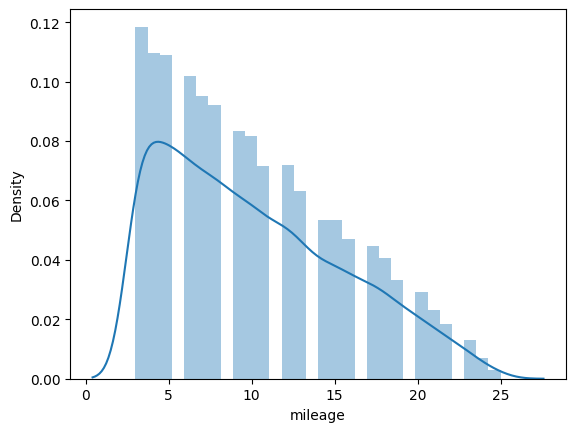

In [214]:
sns.distplot(data['mileage'])

<AxesSubplot: xlabel='avg_speed', ylabel='Count'>

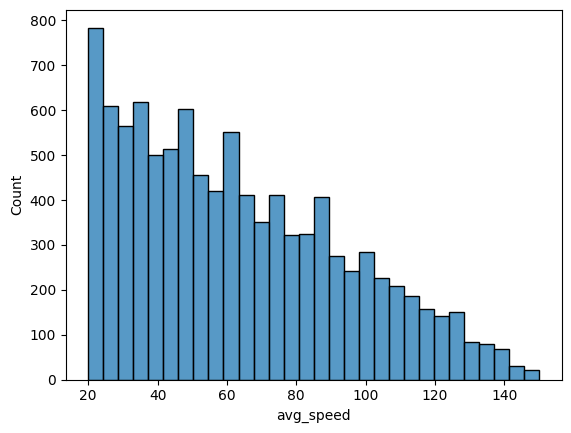

In [215]:
sns.histplot(data['avg_speed'])

# Bivariate analysis

In [216]:
sns.lineplot(data['distance'], data['avg_speed'])

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

In [217]:
sns.scatterplot(data['mileage'], data['distance'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

# Multivariate analysis

In [218]:
sns.scatterplot(data['avg_speed'], data['consume'], hue = data['fuel_type'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

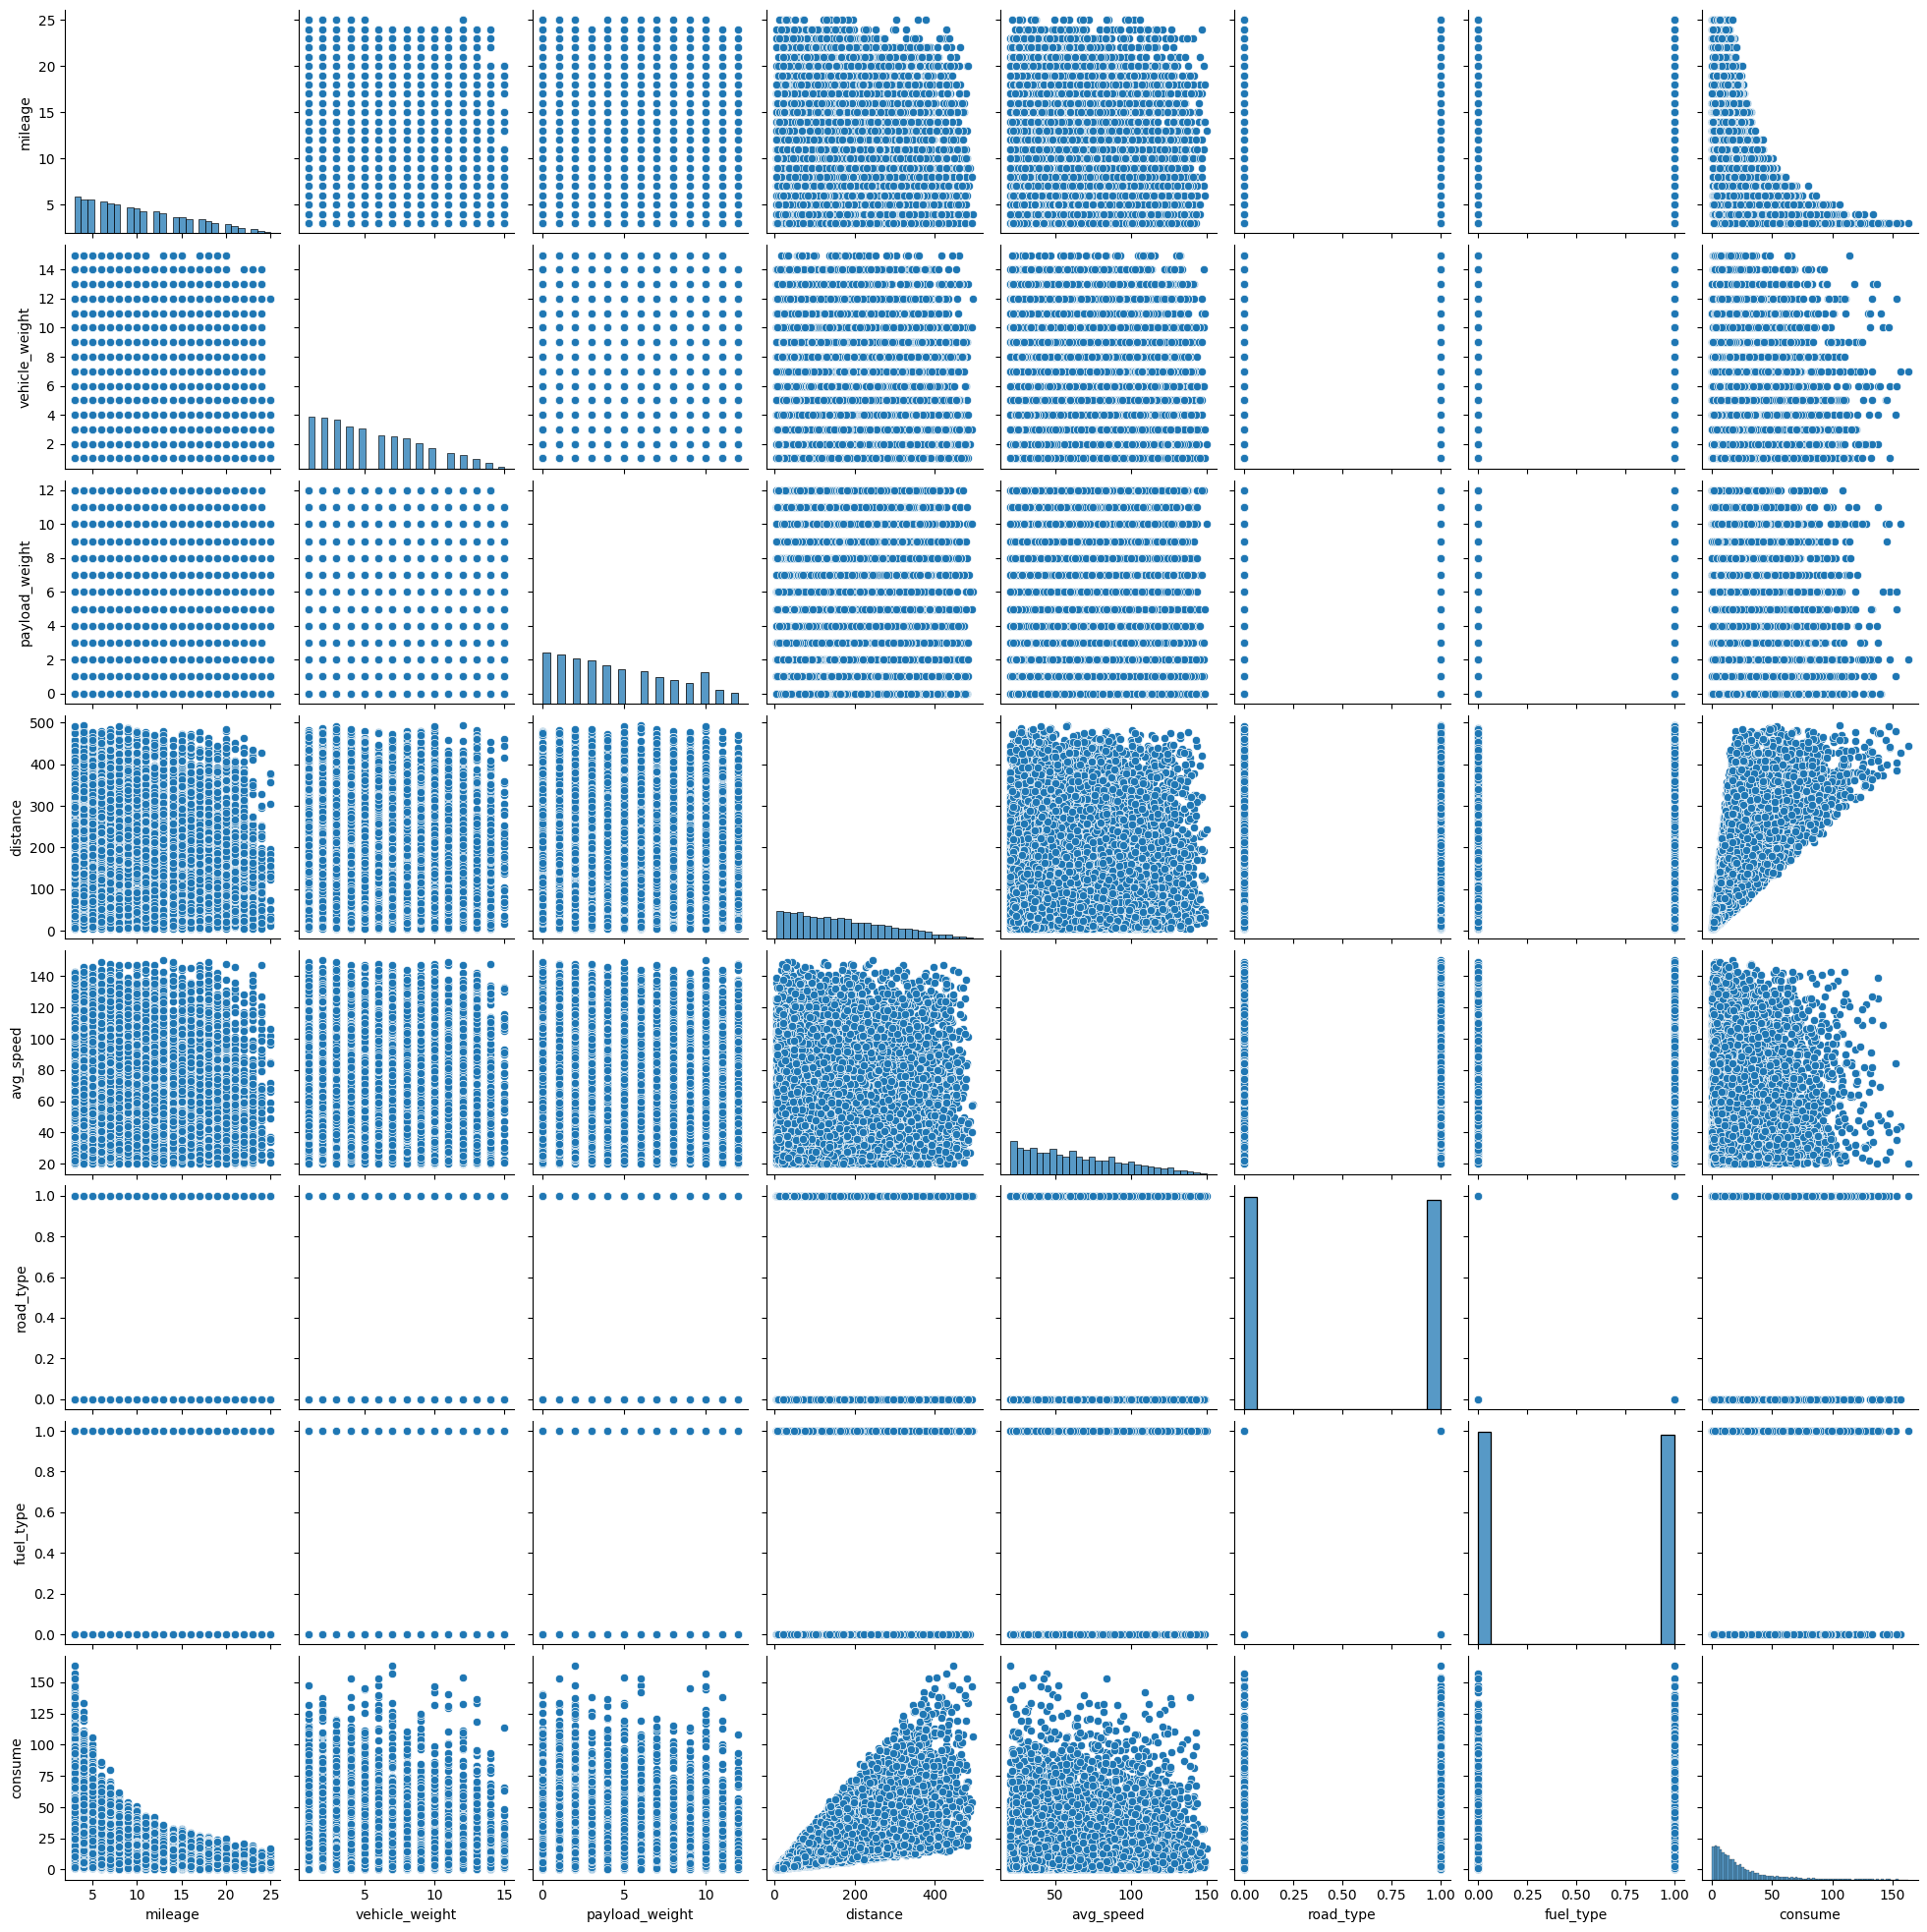

In [219]:
sns.pairplot(data)

# Handling outliers

<AxesSubplot: >

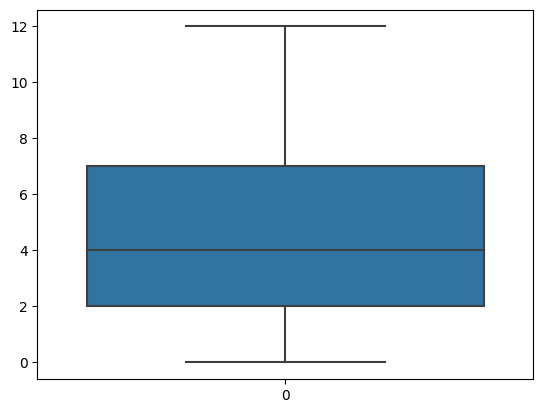

In [220]:
sns.boxplot(data['payload_weight'])

In [221]:
q  = data.quantile([0.75,0.25])
q

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type,consume
0.75,14.0,8.0,7.0,253.0,85.0,1.0,1.0,28.7625
0.25,6.0,3.0,2.0,71.0,37.0,0.0,0.0,6.6800


In [222]:
iqr =  q.iloc[0] - q.iloc[1]   #q3 -  q1 === 0.75 - 0.25
iqr

mileage             8.0000
vehicle_weight      5.0000
payload_weight      5.0000
distance          182.0000
avg_speed          48.0000
road_type           1.0000
fuel_type           1.0000
consume            22.0825
dtype: float64

In [223]:
u = q.iloc[0] + (1.5*iqr)   # q3 + 1.5 * iqr
u

mileage            26.00000
vehicle_weight     15.50000
payload_weight     14.50000
distance          526.00000
avg_speed         157.00000
road_type           2.50000
fuel_type           2.50000
consume            61.88625
dtype: float64

In [224]:
l = q.iloc[1] - (1.5*iqr)  #q1 - 1.5*n iqr
l

mileage            -6.00000
vehicle_weight     -4.50000
payload_weight     -5.50000
distance         -202.00000
avg_speed         -35.00000
road_type          -1.50000
fuel_type          -1.50000
consume           -26.44375
dtype: float64

In [225]:
data['payload_weight'] = np.where(data['payload_weight']>12, 10, data['payload_weight'])

<AxesSubplot: >

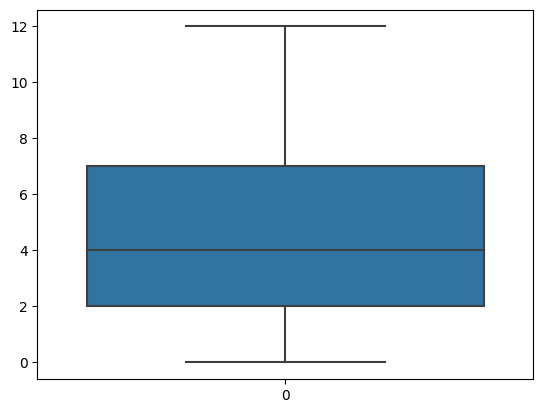

In [226]:
sns.boxplot(data['payload_weight'])

# Encoding

In [227]:
le = LabelEncoder()
data['fuel_type'] = le.fit_transform(data['fuel_type' ])
data['road_type'] = le.fit_transform(data['road_type'])
data

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type,consume
0,13,6,2,79,24,1,1,6.31
1,6,9,1,274,53,1,1,42.18
2,8,8,10,9,34,1,1,0.97
3,9,12,7,341,32,0,0,41.48
4,15,1,12,68,52,1,0,3.75
...,...,...,...,...,...,...,...,...
9995,3,10,3,297,22,0,0,93.51
9996,16,1,3,117,60,1,1,7.44
9997,12,10,4,213,75,1,1,17.36
9998,16,8,5,50,99,1,1,2.77


# Split the data into x and y

In [228]:
y = data['consume']
data1 = data.drop(['consume'], axis = 1)
x = data1

In [229]:
x

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type
0,13,6,2,79,24,1,1
1,6,9,1,274,53,1,1
2,8,8,10,9,34,1,1
3,9,12,7,341,32,0,0
4,15,1,12,68,52,1,0
...,...,...,...,...,...,...,...
9995,3,10,3,297,22,0,0
9996,16,1,3,117,60,1,1
9997,12,10,4,213,75,1,1
9998,16,8,5,50,99,1,1


In [230]:
y

0        6.31
1       42.18
2        0.97
3       41.48
4        3.75
        ...  
9995    93.51
9996     7.44
9997    17.36
9998     2.77
9999    10.94
Name: consume, Length: 10000, dtype: float64

# Scaling

In [231]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Split x and y into train and test

In [232]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [233]:
x_train.shape

(7000, 7)

In [234]:
x_train

,mileage,vehicle_weight,payload_weight,distance,avg_speed,road_type,fuel_type
2228,9,7,5,67,78,0,1
5910,10,2,6,150,34,0,1
1950,4,5,2,89,70,0,0
2119,17,1,5,63,74,0,0
5947,5,1,1,302,37,0,1
...,...,...,...,...,...,...,...
2895,4,9,1,124,30,1,0
7813,4,5,4,377,56,1,0
905,13,1,6,140,26,1,1
5192,3,8,5,35,62,0,1


In [235]:
x_test.shape

(3000, 7)

In [236]:
y_train

2228     7.46
5910    15.61
1950    24.46
2119     3.08
5947    51.36
        ...  
2895    30.62
7813    82.95
905     10.84
5192     9.82
235     59.21
Name: consume, Length: 7000, dtype: float64

In [237]:
y_test

9953    20.05
3850     3.99
4962    19.53
3886    11.88
5437     5.18
        ...  
5273     3.88
8014     6.06
8984    98.38
6498    30.29
6327    50.90
Name: consume, Length: 3000, dtype: float64

# Model Building - Multilinear Regression

In [238]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None)
mlr.fit(x_train,y_train)

LinearRegression()

In [239]:
pred = mlr.predict(x_test)

In [240]:
pred


array([ 27.11588469, -14.17577458,  24.43599781, ...,  55.70470586,
        40.35195718,  37.53950029])

In [241]:
mlr.predict([[10,2,6,150,34,0,1]])

array([19.2681918])

# Performance Metrics

In [259]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [260]:
mae = mean_absolute_error(y_test, pred)
mae

8.203867369235024

In [261]:
mse= mean_squared_error(y_test,pred)
mse

128.39806863056307

In [262]:
rmse = np.sqrt(mse)
rmse

11.331287156830996

In [263]:
r2_score(y_test,pred)

0.721307989574244

# Hyperparameter Tuning

In [246]:
from sklearn.model_selection import RandomizedSearchCV

In [247]:
# parameters= {"n_estimators":[10,35,50,70,100,200],
#              "max_depth":[3,5,10],
#              "min_samples_split":[10,25,40,70,100,300],
#              "min_samples_leaf":[1,20,40,100],
#              "max_features":[0.5,1,"sqrt","auto"]
# }

parameters= {
    "fit_intercept": [False],
    'copy_X':[True],
    'n_jobs':[-1],
    
    'positive': [False]
}

# parameters= [False, True, True, False]


In [248]:
rcv= RandomizedSearchCV(LinearRegression(n_jobs=-1), param_distributions=parameters,n_iter=10,cv=5,verbose=True)

In [249]:
rcv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=LinearRegression(n_jobs=-1),
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [False],
                                        'n_jobs': [-1], 'positive': [False]},
                   verbose=True)>

In [250]:
rcv.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(n_jobs=-1),
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [False],
                                        'n_jobs': [-1], 'positive': [False]},
                   verbose=True)

In [252]:
rcv.score(x_test, pred)

0.9292735740693612

# Validation - Cross Validation

In [253]:
from sklearn.model_selection import cross_val_score

In [254]:
lin_score = cross_val_score(rcv, x, y, cv=5, scoring="neg_mean_absolute_error")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [255]:
lin_score_n = -lin_score
lin_score_n

array([8.75539133, 9.01726042, 8.87656065, 8.67217387, 8.75847804])

In [205]:
np.mean(lin_score_n)

8.815972860563146